In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

Sample generation

In [17]:
uniform_samples = np.random.uniform(0, 1, 1000)
normal_01_samples = np.random.normal(0, 1, 1000)
normal_010_samples = np.random.normal(0, 10, 1000)
beta_11_samples = np.random.beta(1, 1, 1000)
beta_22_samples = np.random.beta(2, 2, 1000)
beta_39_samples = np.random.beta(3, 9, 1000)
normal_2d_samples1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 10000)
normal_2d_samples2 = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10000)

Uniform distribution histogram

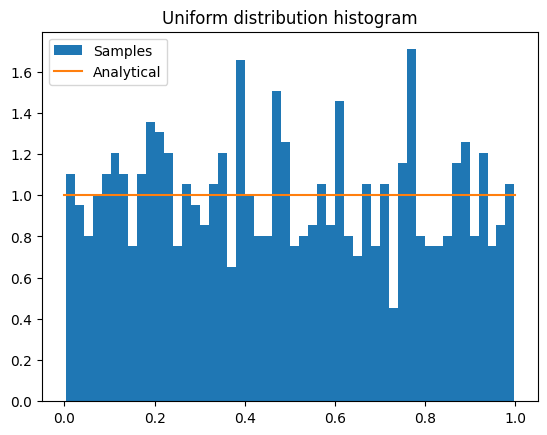

In [18]:
_, ax = plt.subplots()
ax.hist(uniform_samples, bins=50, density=True, label="Samples")
x = np.linspace(0, 1, 2)
ax.plot(x, np.ones_like(x), label="Analytical")
ax.legend()
ax.set_title("Uniform distribution histogram")
plt.show()

Normal distribution histograms

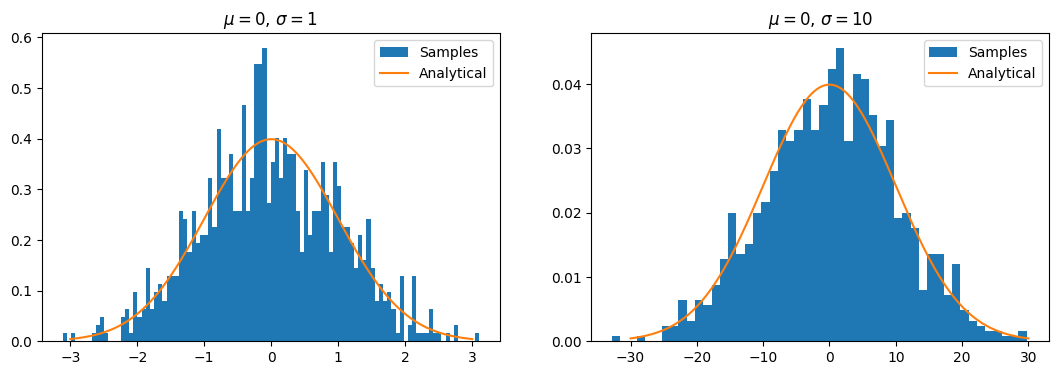

In [19]:
_, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].hist(normal_01_samples, bins=100, density=True, label="Samples")
x = np.linspace(-3, 3, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-np.square(x) / 2)
ax[0].plot(x, y, label="Analytical")
ax[0].legend()
ax[0].set_title("$\mu = 0$, $\sigma = 1$")

ax[1].hist(normal_010_samples, bins=50, density=True, label="Samples")
x = np.linspace(-30, 30, 1000)
y = 1 / (10 * np.sqrt(2 * np.pi)) * np.exp(-np.square(x / 10) / 2)
ax[1].plot(x, y, label="Analytical")
ax[1].legend()
ax[1].set_title("$\mu = 0$, $\sigma = 10$")

plt.show()

Beta distribution histograms

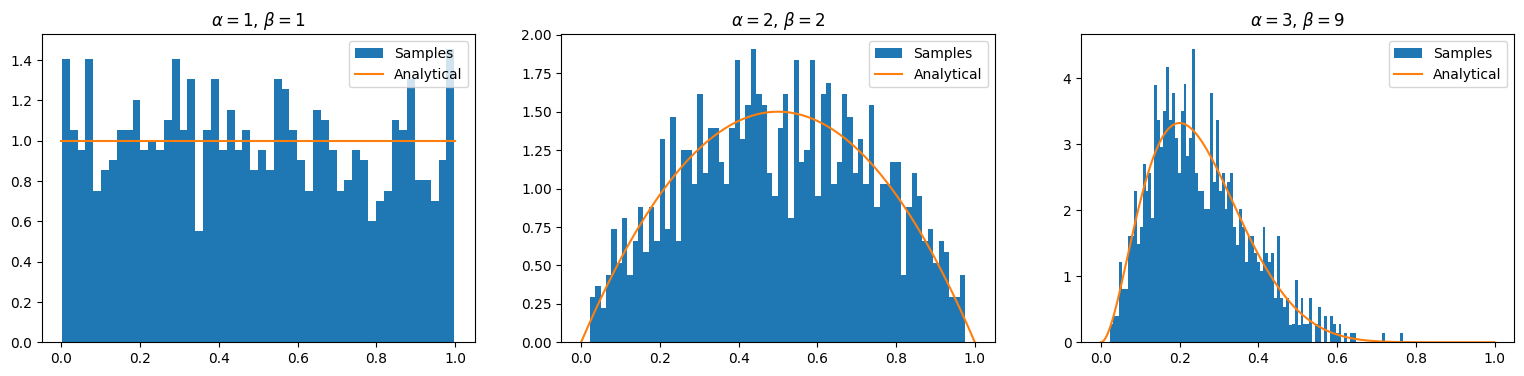

In [20]:
_, ax = plt.subplots(1, 3, figsize=(19, 4))
ax[0].hist(beta_11_samples, bins=50, density=True, label="Samples")
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 1, 1)
ax[0].plot(x, y, label="Analytical")
ax[0].legend()
ax[0].set_title("$\\alpha = 1$, $\\beta = 1$")

ax[1].hist(beta_22_samples, bins=70, density=True, label="Samples")
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 2, 2)
ax[1].plot(x, y, label="Analytical")
ax[1].legend()
ax[1].set_title("$\\alpha = 2$, $\\beta = 2$")

ax[2].hist(beta_39_samples, bins=100, density=True, label="Samples")
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 3, 9)
ax[2].plot(x, y, label="Analytical")
ax[2].legend()
ax[2].set_title("$\\alpha = 3$, $\\beta = 9$")

plt.show()

Two-dimensional normal distribution histograms

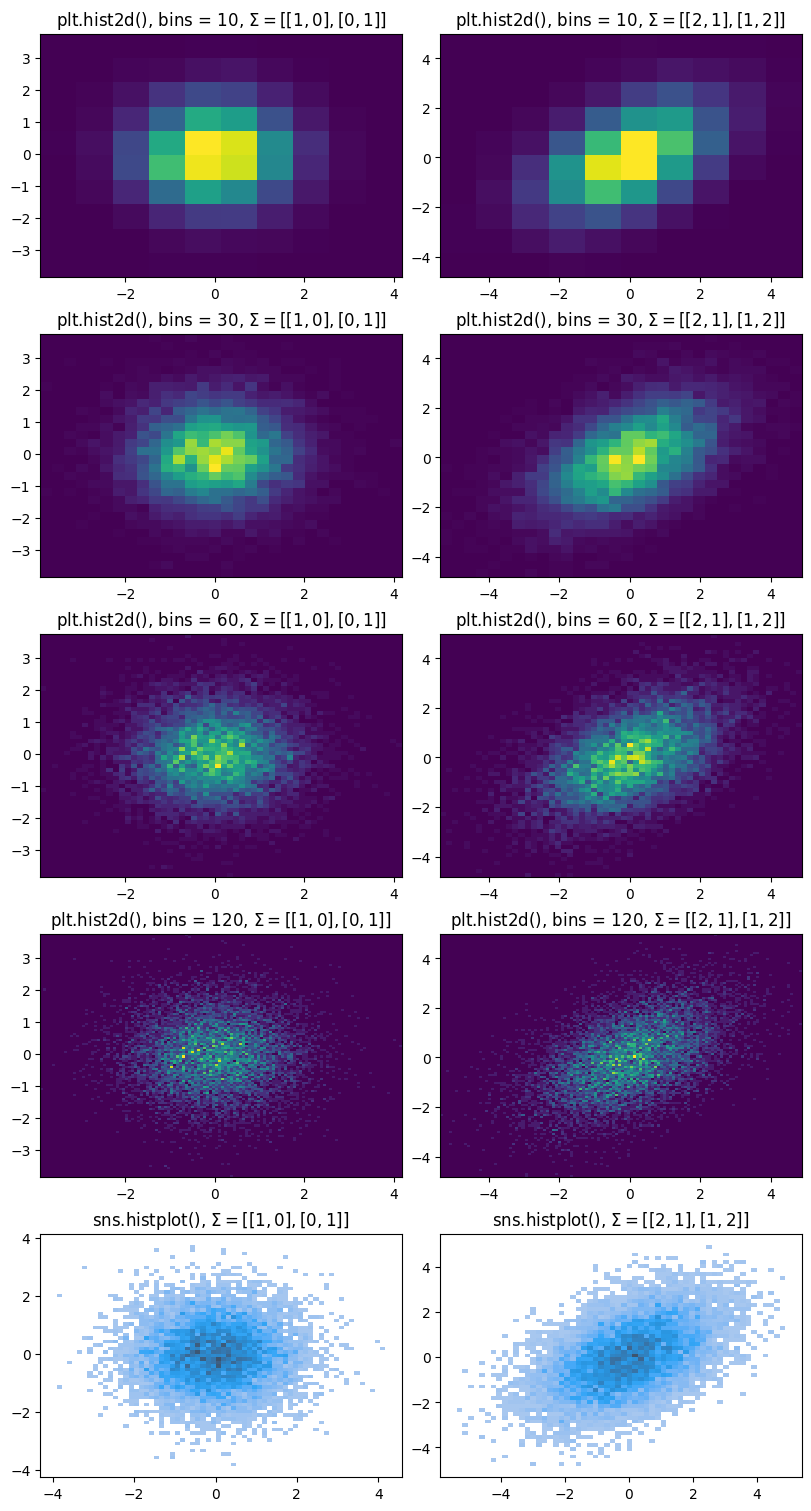

In [23]:
rows = 5
bins = [10, 30, 60, 120]
_, ax = plt.subplots(rows, 2, figsize=(8, 15), constrained_layout=True)

for row in range(rows)[:-1]:
    ax[row, 0].hist2d(normal_2d_samples1[:, 0], normal_2d_samples1[:, 1], bins=bins[row], density=True)
    ax[row, 0].set_title(f"plt.hist2d(), bins = {bins[row]}, $\Sigma = [[1, 0], [0, 1]]$")

    ax[row, 1].hist2d(normal_2d_samples2[:, 0], normal_2d_samples2[:, 1], bins=bins[row], density=True)
    ax[row, 1].set_title(f"plt.hist2d(), bins = {bins[row]}, $\Sigma = [[2, 1], [1, 2]]$")

sns.histplot(x=normal_2d_samples1[:, 0], y=normal_2d_samples1[:, 1], ax=ax[4, 0])
ax[4, 0].set_title(f"sns.histplot(), $\Sigma = [[1, 0], [0, 1]]$")
sns.histplot(x=normal_2d_samples2[:, 0], y=normal_2d_samples2[:, 1], ax=ax[4, 1])
ax[4, 1].set_title(f"sns.histplot(), $\Sigma = [[2, 1], [1, 2]]$")
plt.show()

Points generation

In [24]:
y_points = []
x_points = []
alphas = []
betas = []
for _ in range(1000):
    alpha = np.random.normal(2, 0.1)
    beta = np.random.normal(0.2, 0.2)
    x = np.random.normal(0, 3)
    sigma = abs(np.random.normal(0, 1))
    mu = alpha + beta * x

    x_points.append(x)
    alphas.append(alpha)
    betas.append(beta)
    y_points.append(np.random.normal(mu, sigma))

Plot

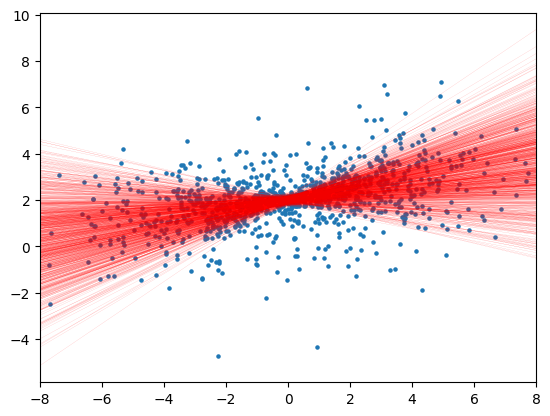

In [33]:
plt.scatter(x_points, y_points, s=5)
for alpha, beta in zip(alphas, betas):
    x = np.linspace(-8, 8, 1000)
    y = alpha + beta * x
    plt.plot(x, y, 'r', linewidth=0.05)
plt.xlim([-8, 8])
plt.show()